In [4]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.layers import TimeDistributed, Dense, Conv2D, MaxPooling2D, Dense, Flatten, LSTM

# Load and preprocessing

In [ ]:
def load_img(img_path, target_size=(128, 128)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img = tf.keras.utils.img_to_array(img)
    img /= 255.
    return img


image_sequences = []
for sequence_folder in sorted(os.listdir('/path_to_paddy_dataset')):
    sequence = []
    for img_file in sorted(os.listdir(os.path.join('/path_to_paddy_dataset', sequence_folder))):
        img_path = os.path.join('/path_to_paddy_dataset', sequence_folder, img_file)
        img = load_img(img_path)
        sequence.append(img)
    image_sequences.append(sequence)

In [ ]:
data = np.load('cnn-lstm/paddy_time_distributed_data.npy')

# Model

In [2]:
inputs = tf.keras.layers.Input(shape=(10, 128, 128, 3))
x = TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu'))(inputs)
x = TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu'))(x)
x = TimeDistributed(MaxPooling2D((2, 2)))(x)
x = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(x)
x = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(x)
x = TimeDistributed(MaxPooling2D((2, 2)))(x)
x = TimeDistributed(Flatten())(x)
lstm1 = LSTM(128, return_sequences=True, name='lstm1')(x)
lstm2 = LSTM(128, return_sequences=False, name='lstm2')(lstm1)
dense = Dense(128, activation='relu')(lstm2)
outputs = Dense(1)(dense)

In [6]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 128, 128, 3)  0         
                             ]                                   
                                                                 
 time_distributed (TimeDistr  (None, 10, 128, 128, 32)  896      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 128, 128, 32)  9248     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 64, 64, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 64, 64, 64)   1849

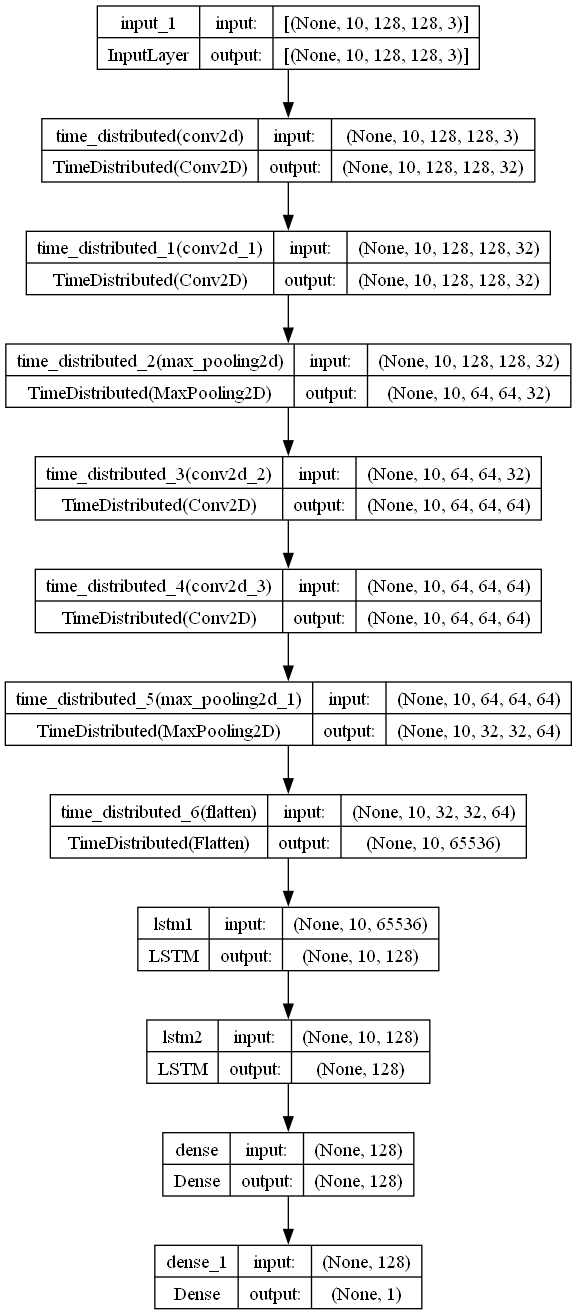

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)